__<h2>Customer Segmentation - I # KNOW YOUR METRICS</h2>__

In order to increase growth,efficiency,revenue,orders & sigups we can leverage predictive analytics. But, first of all we need 
to know the north star metric which is the single metric that best captures the core values that your product delivers to the 
customer.

North Star Metric depends on company's products, position, target & more. For eg,for airbnb it is nights booked whereas for 
facebook it is daily active users.

Suppose for our online retail store the north star metric is monthly revenue

In [5]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#

In [7]:
data = pd.read_csv("OnlineRetail.csv",encoding='latin1')

In [8]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Monthly Revenue = Active customer count*Order Count*Average revenue per user

In [9]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [10]:
data["Invoice_YearMonth"] = data["InvoiceDate"].map(lambda date: 100*date.year + date.month)

In [11]:
data["Revenue"] = data["UnitPrice"]*data["Quantity"]

In [41]:
data_revenue = data.groupby(["Invoice_YearMonth"])["Revenue"].sum().reset_index()

In [42]:
data_revenue

,Invoice_YearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


__Monthly Revenue Growth Rate__

In [43]:
data_revenue["Monthly Growth"] = data_revenue["Revenue"].pct_change()

In [15]:
data_revenue

,Invoice_YearMonth,Revenue,Monthly Growth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


In [90]:
data_revenue.dropna(inplace=True)
data_revenue["Invoice_YearMonth"] = data_revenue["Invoice_YearMonth"].astype(str)

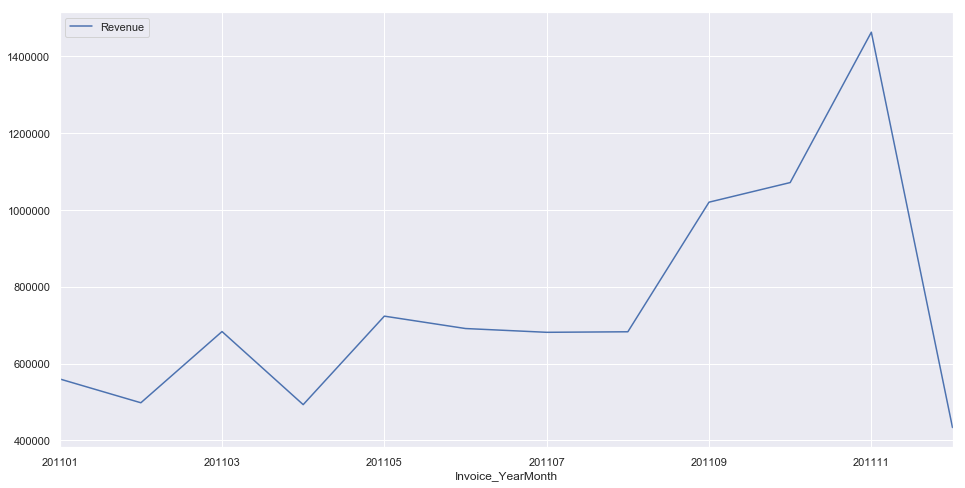

In [107]:
fig, ax = plt.subplots(figsize=(16,8))
data_revenue.plot(x='Invoice_YearMonth',y='Revenue',kind ='line',ax=ax)
plt.show()

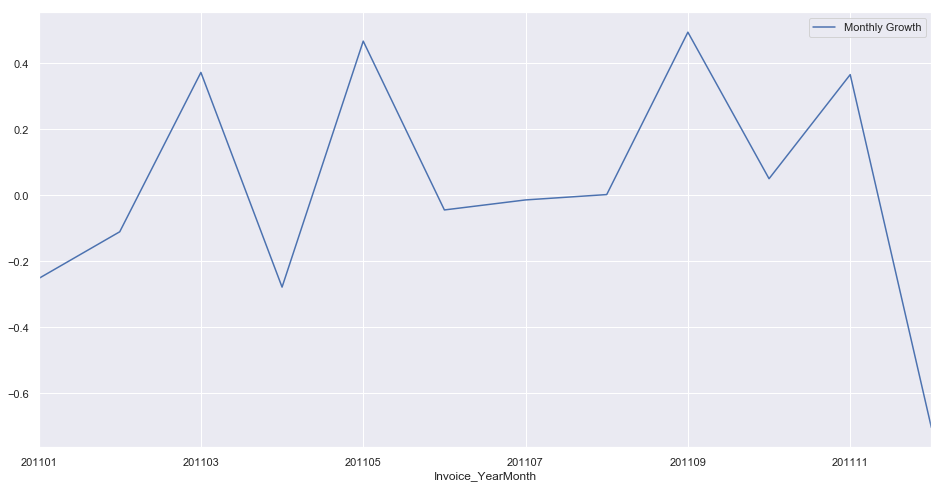

In [106]:
fig, ax = plt.subplots(figsize=(16,8))
data_revenue.plot(x='Invoice_YearMonth',y='Monthly Growth',kind ='line',ax=ax)
plt.show()

__Monthly Active Customers__

In [17]:
data_uk = pd.DataFrame(data.query("Country=='United Kingdom'").reset_index(drop=True))

In [18]:
data_mac = data_uk.groupby('Invoice_YearMonth')['CustomerID'].nunique().reset_index()

In [97]:
data_mac

,Invoice_YearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


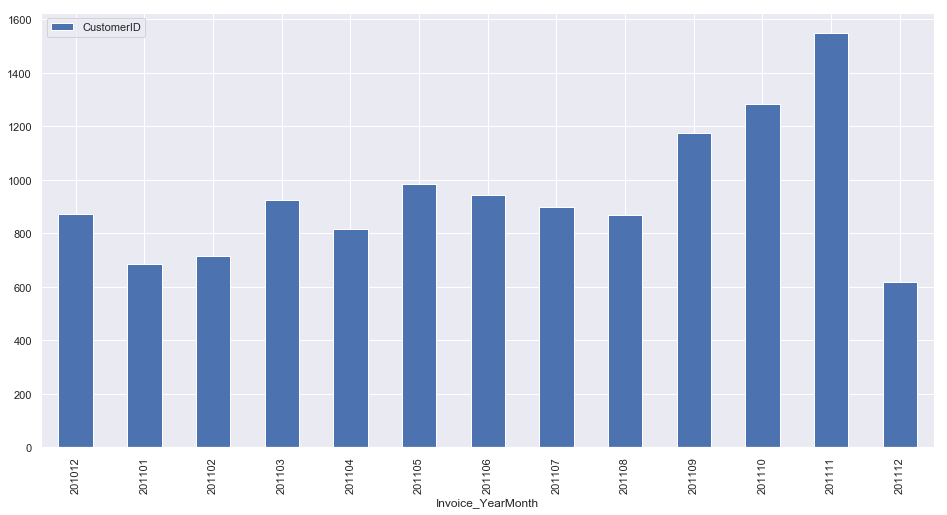

In [105]:
fig, ax = plt.subplots(figsize=(16,8))
data_mac.plot(x='Invoice_YearMonth',y='CustomerID',kind ='bar',ax=ax)
plt.show()

__Monthly Order Count__

In [20]:
data_moc = data_uk.groupby('Invoice_YearMonth')['Quantity'].sum().reset_index()

In [108]:
data_moc

,Invoice_YearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


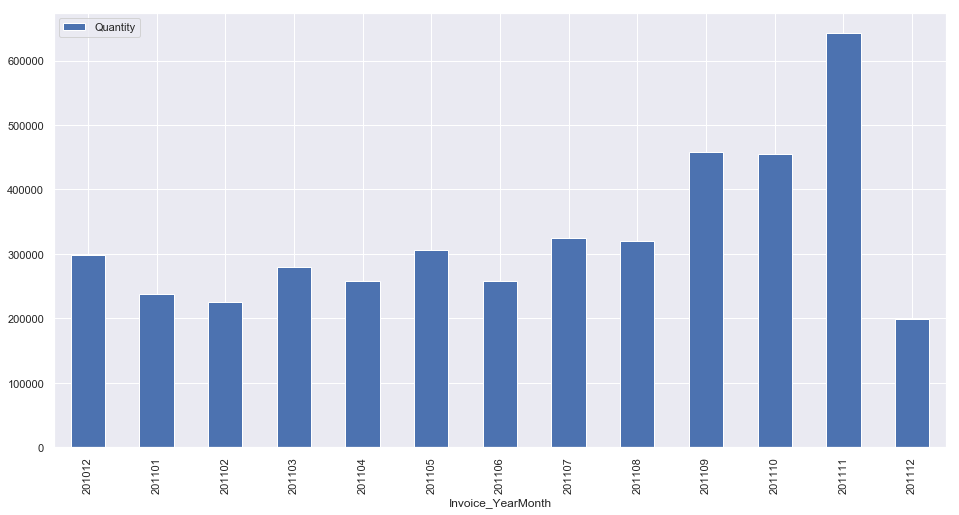

In [110]:
fig, ax = plt.subplots(figsize=(16,8))
data_moc.plot(x='Invoice_YearMonth',y='Quantity',kind ='bar',ax=ax)
plt.show()

__Average Revenue per Order__

In [22]:
data_aro = data_uk.groupby('Invoice_YearMonth')['Revenue'].mean().reset_index()

In [111]:
data_aro

,Invoice_YearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


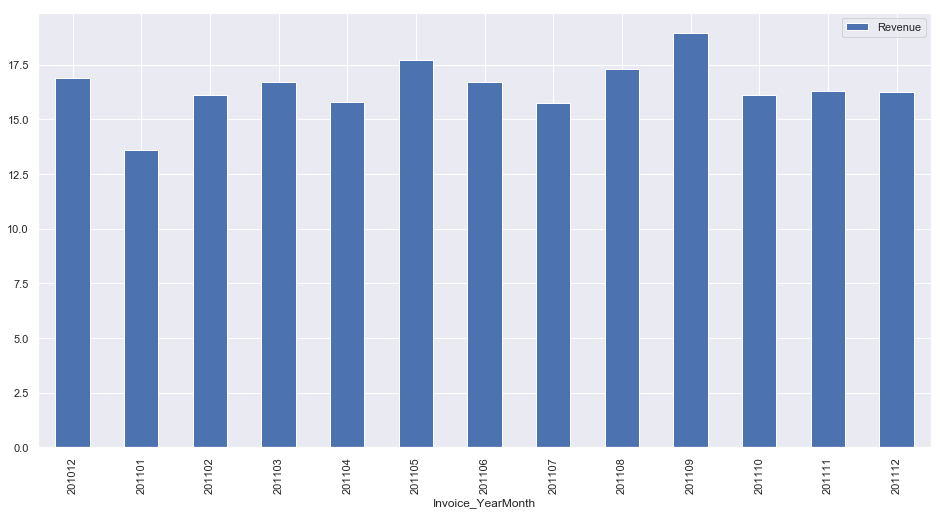

In [112]:
fig, ax = plt.subplots(figsize=(16,8))
data_aro.plot(x='Invoice_YearMonth',y='Revenue',kind ='bar',ax=ax)
plt.show()

__New Customer Ratio__

In [24]:
data_ncr = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

In [25]:
data_ncr.columns = ['CustomerID','Min_Purchase_Date']

In [26]:
data_ncr["Min_Purchase_YearMonth"] = data_ncr['Min_Purchase_Date'].map(lambda date : 100*date.year+date.month)

In [27]:
data_uk = pd.merge(data_uk,data_ncr,on='CustomerID')

In [28]:
data_uk.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_YearMonth,Revenue,Min_Purchase_Date,Min_Purchase_YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,25.50,2010-12-01 08:26:00,201012
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012


In [29]:
data_uk['UserType'] = 'New'
data_uk.loc[data_uk['Invoice_YearMonth']>data_uk['Min_Purchase_YearMonth'],'UserType']= 'Existing'

In [113]:
data_uk.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_YearMonth,Revenue,Min_Purchase_Date,Min_Purchase_YearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,25.50,2010-12-01 08:26:00,201012,New
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012,New
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012,New
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,201012,11.10,2010-12-01 08:26:00,201012,New


In [31]:
data_arpnu = data_uk.groupby(['Invoice_YearMonth','UserType'])['Revenue'].sum().reset_index()

In [131]:
data_arpnu["Invoice_YearMonth"] = data_arpnu["Invoice_YearMonth"].astype(str)
data_arpnu

,Invoice_YearMonth,UserType,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


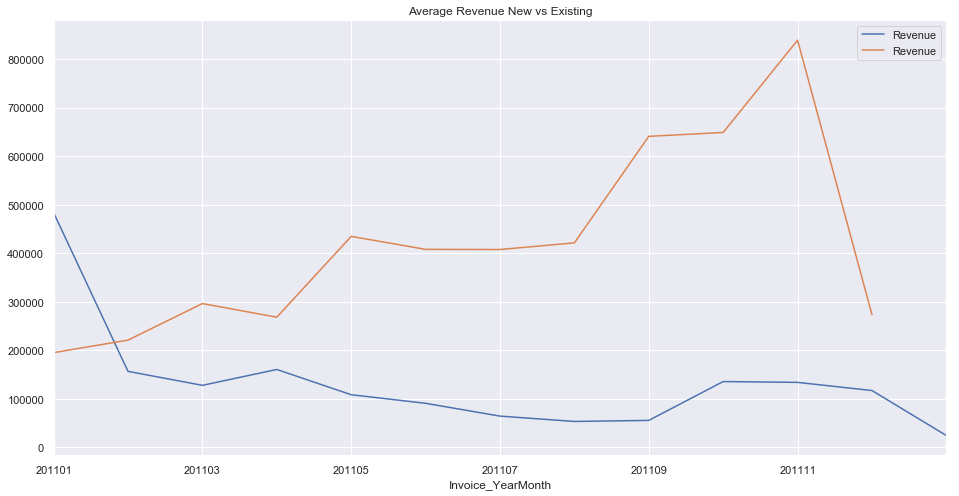

In [132]:
class_new = pd.DataFrame(data_arpnu.loc[data_arpnu["UserType"] == 'New'])
class_exist = pd.DataFrame(data_arpnu.loc[data_arpnu["UserType"] == 'Existing'])
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Average Revenue New vs Existing')
class_new.plot(x='Invoice_YearMonth',y='Revenue',kind='line',ax=ax)
class_exist.plot(x='Invoice_YearMonth',y='Revenue',kind='line',ax=ax)
plt.show()

__Monthly Retention Rate__

Monthly Retention Rate = Retained Customer from previous month/Total Active Customers

In [135]:
data_user_purchase = data_uk.groupby(['CustomerID','Invoice_YearMonth'])['Revenue'].sum().reset_index()

In [136]:
data_user_purchase.head(10)

,CustomerID,Invoice_YearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
5,12747.0,201106,376.30
6,12747.0,201108,301.70
7,12747.0,201110,675.38
8,12747.0,201111,312.73
9,12747.0,201112,438.50


In [137]:
data_retention = pd.crosstab(data_user_purchase['CustomerID'],data_user_purchase['Invoice_YearMonth']).reset_index()

In [138]:
data_retention.head(20)

Invoice_YearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
5,12821.0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,12822.0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,12823.0,0,0,1,1,0,0,0,0,1,1,0,0,0
8,12824.0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,12826.0,1,1,0,0,0,0,1,0,0,1,0,1,1


In [139]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = data_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = data_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = data_retention[(data_retention[selected_month]>0) & (data_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
data_retention = pd.DataFrame(retention_array)
data_retention['RetentionRate'] = data_retention['RetainedUserCount']/data_retention['TotalUserCount']
data_retention

,InvoiceYearMonth,RetainedUserCount,TotalUserCount,RetentionRate
0,201102,263,714,0.368347
1,201103,305,923,0.330444
2,201104,310,817,0.379437
3,201105,369,985,0.374619
4,201106,417,943,0.442206
5,201107,379,899,0.421580
6,201108,391,867,0.450980
7,201109,417,1177,0.354291
8,201110,502,1285,0.390661
9,201111,616,1548,0.397933


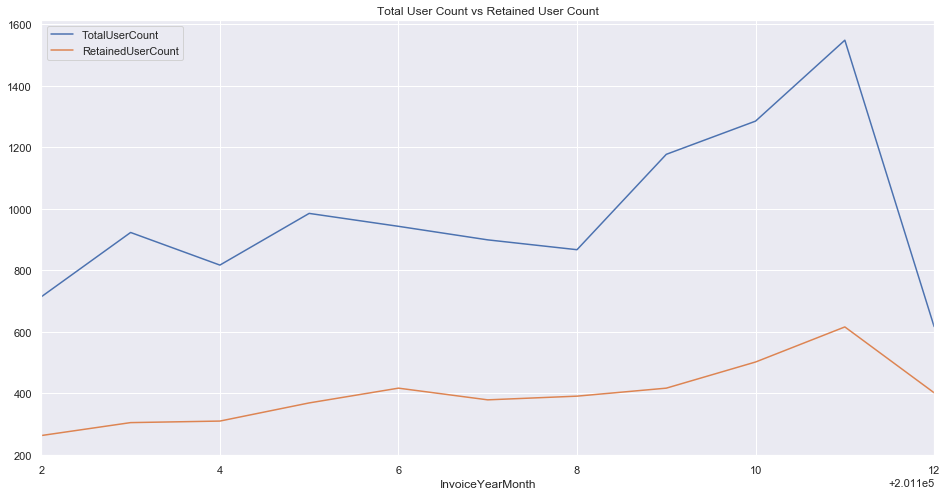

In [141]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Total User Count vs Retained User Count')
data_retention.plot(x='InvoiceYearMonth',y='TotalUserCount',kind='line',ax=ax)
data_retention.plot(x='InvoiceYearMonth',y='RetainedUserCount',kind='line',ax=ax)
plt.show()

__Cohort Based Retention Rate__

In [38]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
data_retention_2 = pd.crosstab(data_user_purchase['CustomerID'], data_user_purchase['Invoice_YearMonth']).reset_index()
new_column_names = [ 'm_' + str(column) for column in data_retention_2.columns]
data_retention_2.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = data_retention_2['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(data_retention_2.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

In [39]:
data_retention = pd.DataFrame(retention_array)
data_retention.index = months

#showing new cohort based retention table
data_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
Invoice_YearMonth,,,,,,,,,,,,,
201101,684,1.0,0.38,0.26,0.18,0.15,0.13,0.12,0.11,0.10,0.08,0.08,0.07
201102,714,NaN,1.00,0.43,0.23,0.19,0.16,0.14,0.12,0.11,0.10,0.09,0.07
201103,923,NaN,NaN,1.00,0.34,0.23,0.17,0.13,0.11,0.11,0.09,0.09,0.06
201104,817,NaN,NaN,NaN,1.00,0.45,0.28,0.20,0.16,0.15,0.12,0.11,0.08
201105,985,NaN,NaN,NaN,NaN,1.00,0.42,0.25,0.19,0.16,0.13,0.12,0.08
201106,943,NaN,NaN,NaN,NaN,NaN,1.00,0.40,0.25,0.19,0.15,0.13,0.09
201107,899,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.43,0.27,0.19,0.17,0.11
201108,867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.48,0.28,0.23,0.14
201109,1177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.43,0.29,0.15
